## 3.2.1.1 Code repository

Here is the link to the GitHub repository containing the required files

https://github.com/shivaraj-brillio/Demo2_Black_Friday

## 3.2.1.2 Code origin certification

## 3.2.2.1 Dataset in Google Cloud

The dataset resides in a bucket namely, `bucketdemo2blackfridaysales`

**_Project Name_** - BRLDI-GCPCapabilities AI Audit  
**_Project ID_** - brldi-gcpcapabilities-ai-

The training dataset resides in the said bucket under the name, `train.csv`  
Here is the link to the dataset - _gs://bucketdemo2blackfridaysales/train.csv_

## 3.2.3.1 Business goal and machine learning solution

**_Historical Context_**  
The black friday dataset was first introduced in a hackathon conducted online. Due to its unclear nature, it has become popular. Data Scientists mainly use this dataset to perform feature engineering and to test their skills at improving their model's accuracy. The secret nature of the features has lead to many assumptions, which only makes the problem solving more interesting.  

**_The business goal being addressed here_**  
The business goal being addressed here is the prediction of the purchase amount of customers during black friday sales based off of their demographic aspects and product category preferences. Businesses will try to leverage these predictions to manage their inventories and to carefully cater to specific needs and niches.  

**_The machine learning use case_**  
- Exploratory Data Analysis (EDA) provides insights into customer preferences and demographic influences on purchasing decisions.  
- Data preprocessing is essential for preparing the dataset for model training, impacting model accuracy.  
- Feature selection involves choosing key predictors identified during EDA to simplify model complexity.  
- Model selection ensures the chosen model can effectively capture underlying patterns.  
- Hyperparameter tuning fine-tunes model performance by adjusting parameters according to dataset characteristics.  
- Model training involves exposing the model to the dataset for sufficient epochs to comprehend underlying patterns comprehensively.  
- This sequential approach optimizes the analytical process, resulting in robust predictive models.  

**_How the machine learning solution is expected to address the business goal_**  
The model's training-driven predictions will serve businesses with insights that can be employed in inventory management, to construct smart marketing campaigns, to cater to customer needs, and to fathom product category preferences to come up with newer and radical products. Ultimately, 

## 3.2.3.2 Data exploration 

**_How and what type of data exploration was performed_**  

The programming language used here is Python.
We have used the following libraries to perform Exploratory Data Analysis
- pandas  
- numpy  
- seaborn  
- matplotlib   

#### Descriptions of independent and dependent variables   
- **_User_ID_**: Unique identifier assigned to each user.    
- **_Product_ID_**: Unique identifier assigned to each product.    
- **_City_Category_**: This feature categorizes cities as _A_, _B_, and _C_. The details on how the cities are categorized isn't available.     
- **_Stay_In_Current_City_Years_**: A categorical feature that indicates how long users have lived in their respective cities.    
- **_Marital_Status_**: We assume that '0' represents unmarried customers and '1' represents otherwise.    
- **_Product Category features_**: There are 3 features namely, _Product_Category_1_, _Product_Category_2_, and _Product_Category_3_. The values contained in each are of float type. We are assuming that the values represent subcategories.   
- **_Purchase_**: It is the target variable. It is numerical in nature.   
- **_Demographic features_**: The following features are demographics of the user. They are self-explanatory.  
    - _Gender_: Categorical 
    - _Age_: Categorical. Values represent age ranges.  
    - _Occupation_: Numerical. Values represent job titles.  

#### Understanding the data distribution of the target variable  
The data distribution of the target variable was studied to analyse its skewness. The distribution turned out to be positively skewed implying that there were a few purchases that were fancier than the other ones. This inference birthed the assumption that pricier product categories during sales were preferred more than usual which lead to a few extravagant purchases. The large purchases could also have been due to those customers' financial statuses. Deeper insights will be generated in the upcoming steps.  

In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

In [35]:
black_friday_dataset = pd.read_csv("train.csv")
black_friday_dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


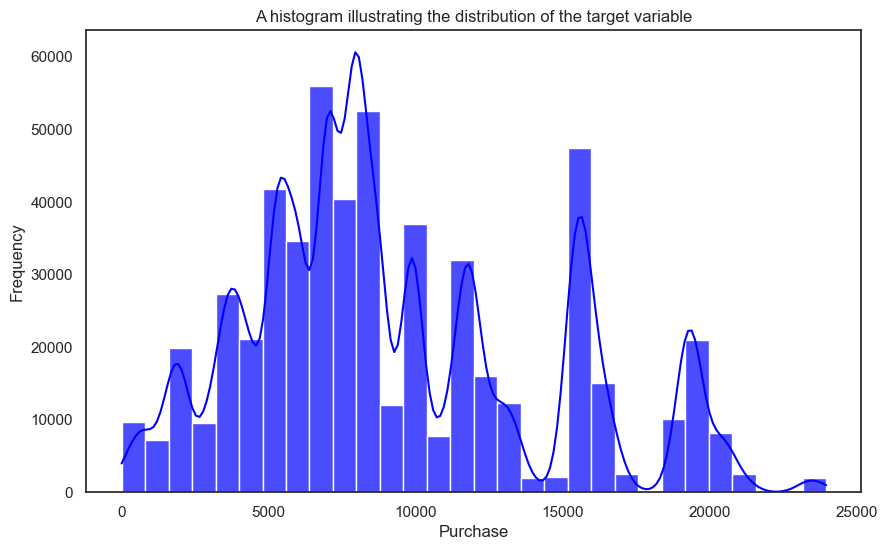

In [12]:
# Illustrating the skewed nature of the target variable with statistical evidence
sns.set_theme(style="white", rc={"axes.facecolor": "white", "figure.facecolor": "white"})
plt.figure(figsize=(10,6))
sns.histplot(black_friday_dataset['Purchase'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('A histogram illustrating the distribution of the target variable')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.show()

**Key Insights**

_Histogram Analysis_  

- Studying the distribution of the target variable helped us have an initial understanding of customer behaviour.    
- We observe that the histogram is `positively skewed`.  
- The range `5000-10000` had the most number of purchases.  
- This implies that customers are willing to exercise their purchasing power within this range.  
- There were few large purchases that caused skewness to the distribution.  
- This could mean that those customers made `large-value` purchases in `premium range products`.  
- Examining which product subcategory was preferred more could tell us more about which main category is a premium product category.  

### Statistical Analysis  

***_Examining the impact of the categorical independent variables on the numerical dependent variable_***

- The objective of these statistical tests was to possess statistical evidences that can back our findings across other analyses  
- `One-way Anova` test was performed to study the impact of the categorical variable `Gender` on the numerical target variable `Purchase`.  
- It concluded that the groups 'M' and 'F' in Gender indeed didn't have identical means.
- This implied that businesses will have to cater specifically to the needs of these groups.  
- To dig deeper into the impact of `Gender and Marital Status` on purchasing decisions, we performed `two-way Anova`.  
- The inference from that was Gender and Marital Status combined had an influence on purchasing decisions.  
- We also learnt that `Gender and Marital Status could potentially be important predictors`.   

In [13]:
# Comparing if the means of two the groups in the Gender variable namely, 'M' and 'F' are identical
from scipy.stats import f_oneway
result = f_oneway(black_friday_dataset['Purchase'][black_friday_dataset['Gender'] == 'M'],
                   black_friday_dataset['Purchase'][black_friday_dataset['Gender'] == 'F'])
print('The F-statistic is: {}'.format(result.statistic), end = '\n\n')
print('The p-value is: {}'.format(result.pvalue))

The F-statistic is: 2010.4424717228953

The p-value is: 0.0


- The null hypothesis of an Anova test is that the means of the independent groups are identical
- In our case, we will begin by assuming that mean purchase amounts of Males and Females is identical
- If we evaluate against an industry standard significance level of 0.05, we have sufficient evidence to disprove the null hypothesis
- It implies that under the assumption that the null hypothesis holds, the probability (p-value) of getting a sample dataset as adeverse if not more is zero
- This essentially means that the results from the tests are not due to random chance.
- We have discovered that the mean purchase of Male and Female don't correspond
- This indicates that `either one of the gender was more active during the sales`
- This information can be leverage to cater more to that gender by offering discounts on product categories they likely prefer.  

In [14]:
# Let us compare Gender and Marital Status against the target variable Purchase
 
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
formula = 'Purchase ~ C(Gender) + C(Marital_Status) + C(Gender):C(Marital_Status)'
model = ols(formula, data=black_friday_dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                   sum_sq        df            F        PR(>F)
C(Gender)                    5.053901e+10       1.0  2010.452537  0.000000e+00
C(Marital_Status)            7.785081e+05       1.0     0.030969  8.603092e-01
C(Gender):C(Marital_Status)  7.210731e+08       1.0    28.684440  8.521950e-08
Residual                     1.382758e+13  550064.0          NaN           NaN


We performed the two-way anova test to demonstrate the effect of two different categorical variables namely, Gender and Marital Status on the target variable 'Purchase'.

- Since the p-value is close to zero, we have sufficient evidence to disporve the null hypothesis that states the means of the two groups in Gender is the same.
- Since the p-value is greater than 0.05, we have insufficient evidence to disporve the null hypothesis that states the means of the two groups in marital status is the same.
- Since the p-value is less than 0.05, we have sufficient evidence to disporve the null hypothesis that states the effect on Gender on Purchase and Marital Status on Purchase is the same.  
- As we observed earlier, the purchasing efforts of the two genders are different
- However, `marital status of the customer doesn't seem to have an impact on the target variable`. 
- `The interaction effect of gender and marital status reveals that there is some influence on the target variable`.
- We will uncover this further under Demographic and Financial Analysis   

### Correlation Analysis  

***_Studying the relationship between independent categorical features_***

- The objective of these tests was to discover correlation between independent categorical variables.  
- Businesses can `utilize these insights to understand customer behaviour` during such sales and make appropriate marketing decisions.
- These tests also help decide which features are important.  
- The test for independence between `Gender and Marital Status revealed that there was dependency between the variables`.     
- We performed test for indepedence on popular demographic features hoping to uncover blatant relationships.    
- The test for independence between Age and City Category was performed to see if age of customers influenced where they lived.    
- Studying the impact of both these features on Purchase under Financial Analysis will help us gain some understanding on what 'A', 'B', and 'C' stand for in the feature 'City_Category'.   

In [15]:
# Performing a test for independence between Gender and Marital Status

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(black_friday_dataset['Gender'], black_friday_dataset['Marital_Status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square: {chi2}")
print(f"P-value: {p}")

Chi-square: 74.00272697523472
P-value: 7.80091894540745e-18


**Business Insights**
- The p-value is less than 0.05
- This means that the two categorical variales are indeed dependent
- `A possible inclination of one gender towards a choice of marital status has been uncovered`
- Though the test doesn't divulge much, we can dig deeper by comparing mean purchases of gender with respect to marital status 
- This will help the business in making appropriate business decisions

In [16]:
# Performing a test for independence between Age and City Category

contingency_table1 = pd.crosstab(black_friday_dataset['Age'], black_friday_dataset['City_Category'])

chi2, p, dof, expected = chi2_contingency(contingency_table1)

print(f"Chi-square: {chi2}")
print(f"P-value: {p}")

Chi-square: 22368.805059695536
P-value: 0.0


**Business Insights**
- The p-value is less than 0.05
- This means that the two categorical variales are indeed dependent
- It reveals that `age of the customer impacts where he lives`
- A plausible inference could be that `younger customers` may `prefer living in urban areas`
- Since it is not exactly evident as to what 'A', 'B', and 'C' is in City Category, we can still leverage this insight.
- Understanding how age impacts purchase with respect to city category can help us make meaningful business decisions

In [17]:
# Performing a test for independence between Gender and Age and Marital Status

contingency_table2 = pd.crosstab(black_friday_dataset['Gender'], [black_friday_dataset['Age'], black_friday_dataset['Marital_Status']])

chi2, p, dof, expected = chi2_contingency(contingency_table2)

print(f"Chi-square: {chi2}")
print(f"P-value: {p}")

Chi-square: 2423.2925543020306
P-value: 0.0


**Business Insights**
- The p-value is less than 0.05
- This means that the three categorical variales are indeed dependent
- A plausible inference could be that `younger customers of a particular gender may prefer getting married`
- For instance, if younger men falling under a certain age range prefer getting married, the business can offer discounts on products such as household essentials and clothing items to attract them.

In [18]:
black_friday_dataset_occupation = black_friday_dataset['Occupation'].astype(object)
 
contingency_table3 = pd.crosstab(black_friday_dataset_occupation, black_friday_dataset['Stay_In_Current_City_Years'])
 
chi2, p, dof, expected = chi2_contingency(contingency_table3)
 
print(f"Chi-square: {chi2}")
print(f"P-value: {p}")

Chi-square: 13400.50711887357
P-value: 0.0


**Business Insights**
- We observe that there is a dependency between Occupation and the duration of stay.
- If the nature of the occupation was clear in the dataset, we could've generated some more insights.  
- Visualizing which Occupation has the highest mean purchase can reveal something.
- We will visualize the impact of duration and Occupation on purchasing power under Demography Analysis.  

### Demography & Financial Analysis


In [36]:
black_friday_sales_aggregated_df = black_friday_dataset.groupby('User_ID')['Purchase'].sum().reset_index()
black_friday_sales_aggregated_df = pd.merge(black_friday_sales_aggregated_df, black_friday_dataset[['User_ID', 'Gender', 'Marital_Status', 'City_Category', 'Occupation', 'Stay_In_Current_City_Years', 'Age']], on='User_ID', how='left')
black_friday_sales_aggregated_df = black_friday_sales_aggregated_df.drop_duplicates()
black_friday_sales_aggregated_df

,User_ID,Purchase,Gender,Marital_Status,City_Category,Occupation,Stay_In_Current_City_Years,Age
0,1000001,334093,F,0,A,10,2,0-17
35,1000002,810472,M,0,C,16,4+,55+
112,1000003,341635,M,0,A,15,3,26-35
141,1000004,206468,M,1,B,7,2,46-50
155,1000005,821001,M,1,A,20,1,26-35
...,...,...,...,...,...,...,...,...
549166,1006036,4116058,F,1,B,15,4+,26-35
549680,1006037,1119538,F,0,C,1,4+,46-50
549802,1006038,90034,F,0,C,1,2,55+
549814,1006039,590319,F,1,B,0,4+,46-50


**_Average Purchase by Gender_**

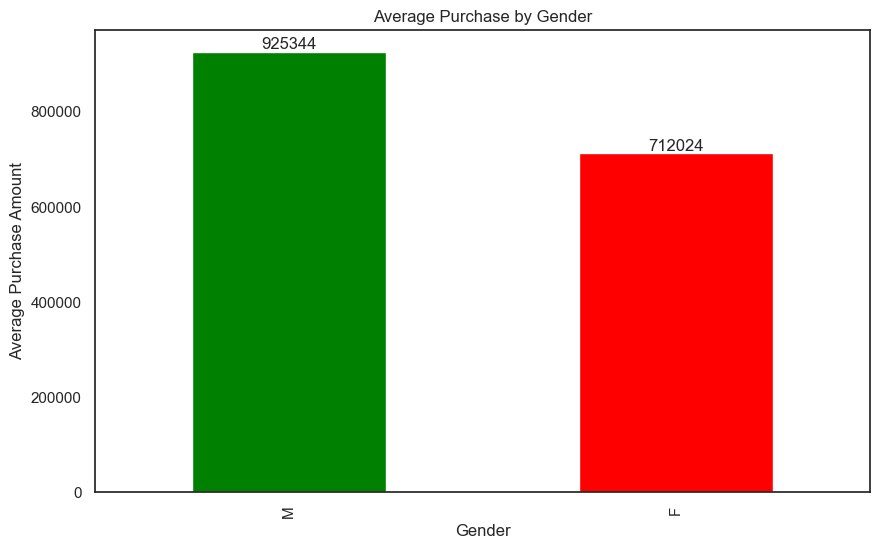

In [23]:
# Compute the mean purchase by gender
mean_purchase_gender = black_friday_sales_aggregated_df.groupby('Gender')['Purchase'].mean().sort_values(ascending=False)

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the data
ax = mean_purchase_gender.plot(kind='bar', color=['green', 'red'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase by Gender')

# Set the y-axis to display full numbers instead of scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Annotate the bars with the mean values as integers
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Display the plot
plt.show()

_Insights gathered_

- We observe that `men have a higher mean purchase than women`.  
- This implies that men had shown more interest during the sales.  
- We assume that the products that men likely prefer were `heavily discounted`  
- As a result, male customers would have made more purchases.  

**_Average Purchase by Marital Status and Gender_**

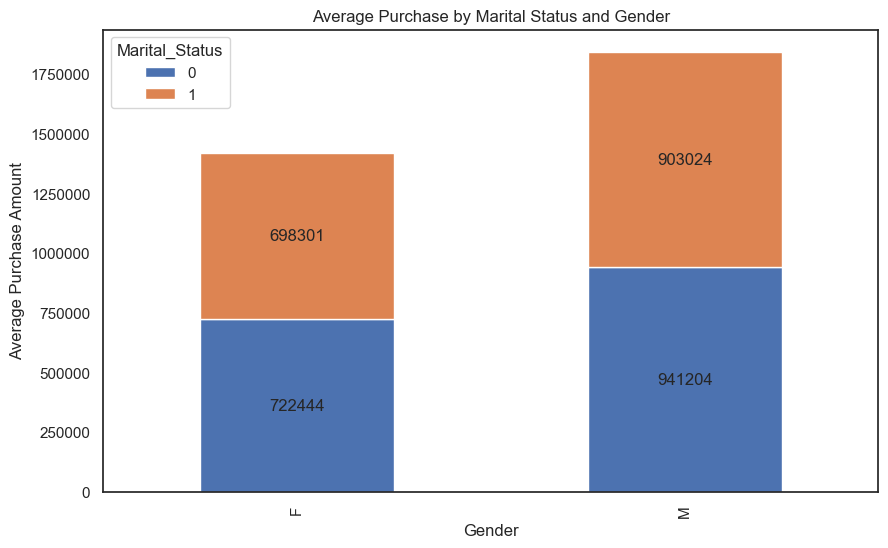

In [24]:
# Let us see how marital status and gender affects Purchase

gender_status_mean = black_friday_sales_aggregated_df.pivot_table(index='Gender', columns='Marital_Status', values='Purchase', aggfunc='mean')
gender_status_mean = black_friday_sales_aggregated_df.pivot_table(index='Gender', columns='Marital_Status', values='Purchase', aggfunc='mean')

# Create the figure and axis
plt.figure(figsize=(10,6))

# Plot the data as a stacked bar chart
ax = gender_status_mean.plot(kind='bar', stacked=True, ax=plt.gca())

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase by Marital Status and Gender')

# Add value labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Set the y-axis to display full numbers instead of scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.show()

_Insights gathered_

- The stacked bar chart visualizes the `impact of marital status and gender` on the target variable `Purchase`.  
- The two-way anova test from eariler confirms our findings here.  
- The mean purchase amounts are notably different.  
- This could be due to the fact that both the genders had become more responsible after marriage.  
- Married customers possibly made less frivolous purchases, which decreased the mean purchase amounts.  

**_Mean Purchase Across Age Ranges_**

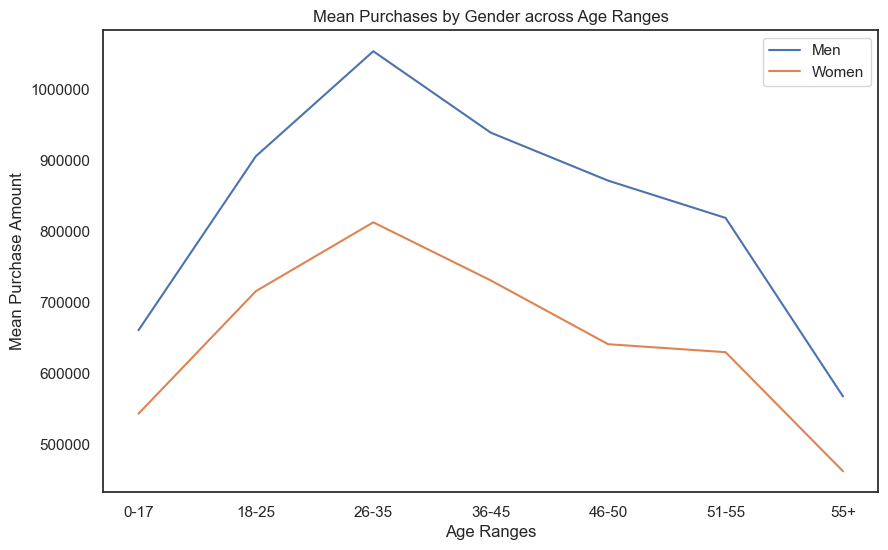

In [26]:
# Filter the data for men
men_data = black_friday_sales_aggregated_df[black_friday_sales_aggregated_df["Gender"] == 'M']
# Filter the data for women
women_data = black_friday_sales_aggregated_df[black_friday_sales_aggregated_df["Gender"] == 'F']

# Compute the mean purchase by age category for men and women separately
age_bins_of_men = men_data.groupby('Age')['Purchase'].mean()
age_bins_of_women = women_data.groupby('Age')['Purchase'].mean()

# Get the x and y values for men
x_men = age_bins_of_men.index
y_men = age_bins_of_men.values

# Get the x and y values for women
x_women = age_bins_of_women.index
y_women = age_bins_of_women.values

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the data for men
plt.plot(x_men, y_men, label='Men')

# Plot the data for women
plt.plot(x_women, y_women, label='Women')

# Add title and labels
plt.title('Mean Purchases by Gender across Age Ranges')
plt.xlabel('Age Ranges')
plt.ylabel('Mean Purchase Amount')

# Set the y-axis to display full numbers instead of scientific notation
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Show the legend
plt.legend()

# Show the plot
plt.show()

_Insights gathered_  

- Since we observed that men had the higher mean purchase amount, we wanted to examine which age range in male customers made higher value purchases.  
- `Men aged 26 to 35 exhibit the highest mean purchase amount, aligning with previous findings indicating the same age group's higher mean purchase amount. This analysis aims to identify target products for businesses, with men in this age bracket likely to purchase more gaming gadgets and clothing items`
- Although women had the lower mean purchase amount, the same age range, that is `26-35` demonstrated the highest mean purchase amount. This goes to show that young customers are more attracted by such sales.  

**_Distribution of Mean Purchase across City Category and Age_**

<Figure size 1000x600 with 0 Axes>

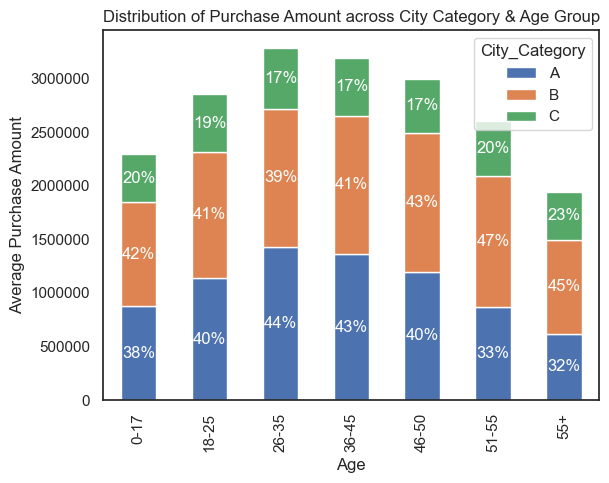

In [44]:
# Compute the pivot table for mean purchase by age and city category
age_city_data = black_friday_sales_aggregated_df.pivot_table(index='Age', columns='City_Category', values='Purchase', aggfunc='mean')

# Calculate the total purchase amount for each age group
age_total_purchase = age_city_data.sum(axis=1)

# Calculate the percentage of purchase for each city category in each age group
age_city_percentage = (age_city_data.div(age_total_purchase, axis=0) * 100).round().astype(int)

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the data as a stacked bar chart
ax = age_city_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.title('Distribution of Purchase Amount across City Category & Age Group')

# Set the y-axis to display full numbers instead of scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Annotate the pivot table inside the visualization with percentage values
for i in range(len(age_city_data.index)):
    for j in range(len(age_city_data.columns)):
        plt.text(i, sum(age_city_data.iloc[i, :j+1]) - age_city_data.iloc[i, j] / 2, f'{age_city_percentage.iloc[i, j]}%', ha='center', va='center', color='white')

# Show the plot
plt.show()

_Insights gathered_  

- We wanted to observe how choice of living and age impacts purchasing powers.   
- We can assume that the city category that consistenly shows a higher percentage of mean purchase amount could be the center of a cosmopolitan city.  
- Such places are usually preferred by individuals that are high-earning.  
- We can leverage this information to provide discounts on even relatively pricier products in these city categories.  
- `The 26-35 age group consistently exhibits the highest average purchase amount across all city categories, confirming previous observations`  
- `City Category A` seems to have the highest mean purchase.       

**_Average Purchase across City Cateogry_** 

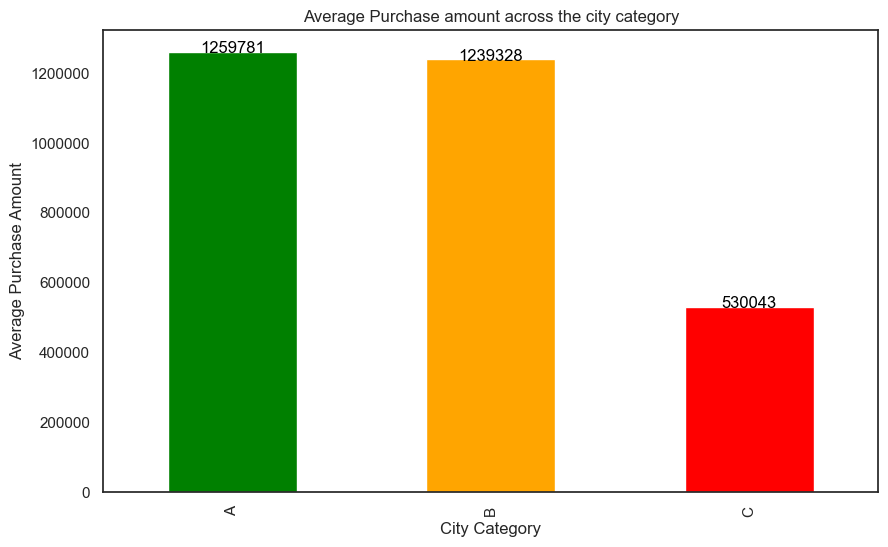

In [27]:
# Compute the mean purchase by city category
city_cat = black_friday_sales_aggregated_df.groupby('City_Category')['Purchase'].mean()

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the data
ax = city_cat.plot(kind='bar', color=['green', 'orange', 'red'])

# Add labels and title
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase amount across the city category')

# Set the y-axis to display full numbers instead of scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Annotate the pivot table inside the bars as integers
for i, v in enumerate(city_cat):
    ax.text(i, v + 10000, f'{int(v)}', ha='center', va='center', color='black')

# Show the plot
plt.show()

_Insights gathered_  

- This visualization confirms our assumption from eariler.  
- `City Category A` has the highest mean purchase amounts.  
- This tells a lot about the purchasing power of customers residing here.  
- Businesses can leverage this by targeting categories A and B.  
- Businesses could try pushing premium products such as costly gadgets since it is evident that the customers in these places can afford it.  

**_Mean Purchase by Occupation_**

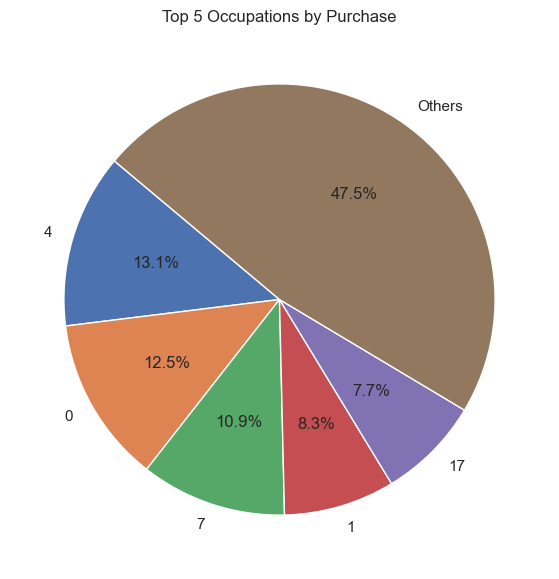

In [28]:
# Aggregate purchase by occupation
occupation_purchase = black_friday_dataset.groupby('Occupation')['Purchase'].sum().reset_index()

# Sort by purchase amount and get top 5 occupations
top_5_occupations = occupation_purchase.sort_values(by='Purchase', ascending=False).head(5)

# Label the rest as 'Others'
top_5_occupations.loc[len(top_5_occupations)] = ['Others', occupation_purchase[~occupation_purchase['Occupation'].isin(top_5_occupations['Occupation'])]['Purchase'].sum()]

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_5_occupations['Purchase'], labels=top_5_occupations['Occupation'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Occupations by Purchase')
plt.show()

_Insights gathered_  

- The dataset doesn't reveal anything about the nature of occupation.  
- To gather something out of it since occupation plays a crucial role in determining purchasing powers, we have constructed this pie chart.  
- It reveals that `Occupation 4` has the highest mean purchase percentage.  
- `It is possibly a white-collar job that pays well`.  

**_Mean Purchase by Occupation and Duration of stay_**

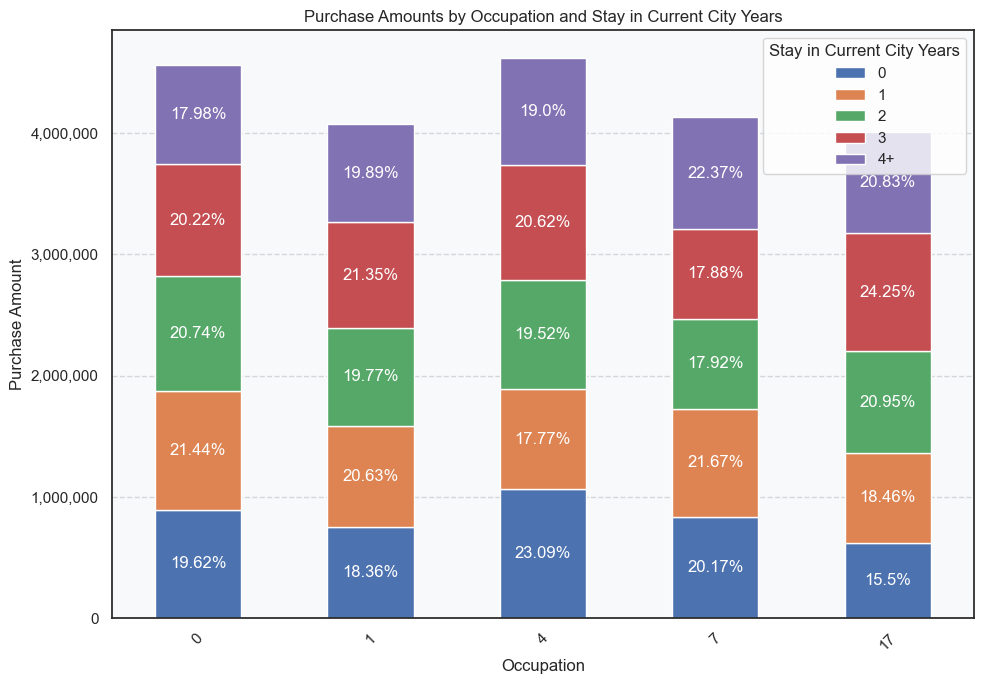

In [29]:
# Function to format y-axis tick labels to display numbers
def format_yticks(value, _):
    return "{:,.0f}".format(value)

occupation_purchase = black_friday_sales_aggregated_df.groupby('Occupation')['Purchase'].sum().reset_index()
top_5_occupations = occupation_purchase.sort_values(by='Purchase', ascending=False).head(5)

top_5_data = black_friday_sales_aggregated_df[black_friday_sales_aggregated_df['Occupation'].isin(top_5_occupations['Occupation'])]
top_5_occupation_duration_table = top_5_data.pivot_table(index='Occupation', columns='Stay_In_Current_City_Years', values='Purchase', aggfunc='mean')

# Calculate mean percentages for each occupation and stay in the current city years combination
mean_percentages = (top_5_occupation_duration_table.div(top_5_occupation_duration_table.sum(axis=1), axis=0) * 100).round(2)

plt.figure(figsize=(10, 7))
ax = plt.subplot(111)  
top_5_occupation_duration_table.plot(kind='bar', stacked=True, ax=ax)

ax.set_facecolor('#f8f9fa')  
ax.yaxis.grid(True, linestyle='--', color='#adb5bd', alpha=0.5)  

plt.title('Purchase Amounts by Occupation and Stay in Current City Years')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)

# Set y-axis tick formatter to display numbers
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))

# Display mean percentages on the stacked bar chart
for i, occupation in enumerate(top_5_occupation_duration_table.index):
    for j, stay_duration in enumerate(top_5_occupation_duration_table.columns):
        plt.text(i, top_5_occupation_duration_table.iloc[i, :j+1].sum() - top_5_occupation_duration_table.iloc[i, j] / 2, 
                 str(mean_percentages.loc[occupation, stay_duration]) + "%", ha='center', va='center', color='white')

plt.legend(title='Stay in Current City Years')
plt.tight_layout()
plt.show()

_Insights gathered_  

- We visualize how the top 5 occupations and duration of stay together impact purchase amounts.  
- It is evident that customers with `Occupation 4` are usually high-earning individuals.  
- We can also assume that customers with `Occupation 4` are `relatively younger people and new to their jobs` since those who have stayed in a city for less than a year have made more purchases.  
- The other occupations are possibly not that high paying since young customers with those job titles haven't spent as much.    

**_Most Preferred subcategories in Product Category 1_**

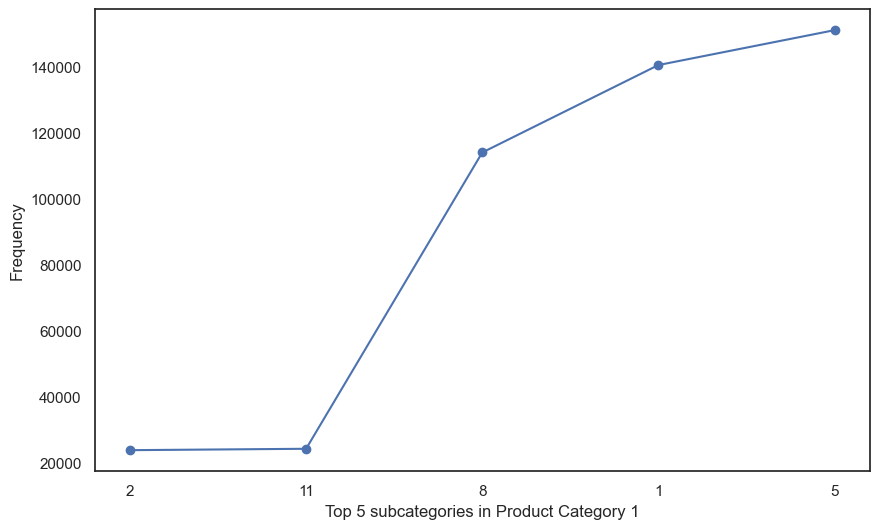

In [30]:
mode_subcategories_product_1 = black_friday_dataset['Product_Category_1'].value_counts()
top_5_mode = mode_subcategories_product_1[:5]
x = top_5_mode.index
y = top_5_mode.values
list_tuple_x_y = list(zip(x,y))
list_tuple_x_y.sort(key = lambda x:x[1])
x1, y1 = [], []
for member in list_tuple_x_y:
    x1.append(member[0])
    y1.append(member[1])

x1 = list(map(str,x1))
  
plt.figure(figsize=(10,6))
plt.xlabel('Top 5 subcategories in Product Category 1')
plt.ylabel('Frequency')
plt.plot(x1,y1, marker='o', linestyle='-')
plt.show()

_Insights gathered_  

- Since it is not evident as to what entries within the product category variables represent, we decided to examine the product category with the least number of null entries.  
- This line chart helps us understand which subcategory is highly preferred in each transaction.  
- Businesses can leverage this information to offer more discounts on that subcategory.  
- `Sub Category 5` in `Product Category 1` is highly preferred in each basket/transaction.  

**_What decisions were influenced by data exploration_**

- Feature Selection would be influenced by data exploration. EDA has revealed potential significant predictors. We can avail this information while performing feature selection to back our results.
- Since the data distribution and the dependency between variables were studied, we will take necessary decisions while selecting models for this dataset.  
- The features `Age, City_Category, Stay_In_Current_City_Years, Occupation, Gender, Marital Status` seem to important predictors.  

## 3.2.3.3 Feature engineering

**_What feature engineering was performed_**

- The missing values in the columns namely, 'Product_Category_2' and 'Product_Category_3' were filled with zeros.  

`We are doing this to maintain the integrity of the product categories. It ensures that a particular subcategory was not purchased in the transaction`.  

- 'User_ID' and 'Product_ID' were dropped.  

`There are too many unique values in these two column. This is done because the model will get overfit & user ID will be the most important feature`.  

- The object type entries in the column 'Gender' were converted to 'int64' type by replacing 'F' with 0 and 'M' with 1.  
- The age ranges in the 'Age' column were encoded by replacing age ranges with integers. Here ordinal encoding is done as the age ranges are increasing from smaller to higher.  
- The categories in the column 'City_Category' were encoded by replacing the categories with integers. Label encoding is done as we don’t know any ordinal relationship between the city.  
- 'Stay_In_Current_City_Years' was also dealt with in the same fashion as the other categorical features.Ordinal encoding is done because it respects the natural order of the durations.  
- Additionally, the entries of the nature '4+' were reduced to '4'.  
- The categorical columns namely, 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', and 'Product_Category_3' were all converted to 'int64' type.  

**_What features were selected for use in machine learning model and why_**

The features selected were namely, `Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1 Product_Category_2, and Product_Category_3`  

`Feature Selection` was performed using the class `SelectKBest` from the sci-kit library. The algorithm calculates the chi-sq test statistic between the features and the target variable (categorical). It ranks them in the descending order and picks the specified number of features. In our case, we picked the top 9 features. These features were proven to be significant by the said feature selection model and also aligned with our findings from EDA. As a result, we decided to go ahead with these features for training the model.  

## 3.2.3.4 Preprocessing and the data pipeline

##### Data Preprocessing  

The data preprocessing task is delegated to the second component of our pipeline. The component reads in the dataset from the path contained in the variable `raw_data`. Kubeflow's syntax doesn't properly process the flow of sequential components when complex data types such as dataframes for instance are passed between them. Consequently, the input is read from 'Input[Dataset]' and the output is written to 'Output[Dataset]'. 

The missing values in the columns, `Product_Category_2` and `Product_Category_3` are `filled with zeros`. Since it is not apparent as to what the entries in the product category columns represent, we have assumed that they represent subcategories. The columns, 'User_ID' and 'Product_ID', are dropped since they are mere identifiers and do not contribute much to understanding the dataset. They can serve as a composite key. In our dataset, each record represents a transaction by a user. It only makes sense to fill the null values with zeros since it would mean that the user hadn't included that subcategory in his basket during that particular transaction. 

##### The Pipeline

**_First Component: Ingestion_**

Each component can be considered a containerized environment that works independently. Therefore, the libraries required for its execution must be installed beforehand. The 'subprocess' class helps us install the requisite libraries. The dataset is stored in a bucket namely, 'bucketdemo2blackfridaysales'. We read the data from it using the class 'storage' from 'google.cloud'. The data is then transformed into a dataframe and then to a 'csv'. It is written to the path specified by Output[Dataset].  

![Ingest.png](images/Ingest.png)



**_Second Component: Preprocessing_**  

The missing values in the columns, 'Product_Category_2' and 'Product_Category_3' are filled with zeros. Since it is not apparent as to what the entries in the product category columns represent, we have assumed that they represent subcategories. The columns, 'User_ID' and 'Product_ID', are dropped since they are mere identifiers and do not contribute much to understanding the dataset. They can serve as a composite key. In our dataset, each record represents a transaction by a user. It only makes sense that we fill the null values with zeros since it would mean that the user hadn't included that subcategory in his basket during that particular transaction. The preprocessed dataframe is converted into a csv and is written to the path specified by the variable 'preprocessed_df'.  

![Preprocessing - component.png](images/Preprocessing_component.png)



**_Third Component: Feature Engineering_**  

The categorical columns in the dataset are encoded by replacing categories with integers. The transformed dataset is converted to a csv and is written to the path specified by 'engineered_df'.  

![Feature engineering - component.png](images/Feature_engineering_component.png)



**_Fourth Component: Feature Selection_**  

In this component, we recruit the services of another class called 'SelectKBest'. As with the other components, the dataset is read from the output path mentioned by its predecessor. An instance of SelectKBest is created. The parameters are 'score_func' and 'k'. 'k' represents the number of features that the algorithm will pick. The instance 'selector' calculates the chi-sq test statistic between the features and the target variable and then picks the top 'k' features. The indices of those features are retrieved. The names of those features and the target variable is stored in a JSON file for later use. The dataset is sliced and now contains only the features selected by SelectKBest. This dataframe is converted to a csv and written to the path specified by 'finalized_features'.  

![Feature Selection - component.png](images/Feature_Selection_component.png)  



**_Fifth Component: Train-test split_**  

90% of the dataset is used for training and the rest for testing. Out of the 90%, 80% is used for training and the rest for validation. All three dataframes are converted to CSVs and are written to paths mentioned by the variables 'train_df', 'validation_df', and 'test_df'.  

![Train-test - component.png](images/Train_test_component.png)  



**_Sixth Component_: Hyperparameter Tuning**    

This component utilizes the validation dataset to tune the hyperparameters. The XGBRegressor model is used and the optimal set of hyperparameters are dumped into a JSON file and saved for later use.  

![Hyperparameter tuning - component.png](images/Hyperparameter_tuning_component.png)  



**_Seventh Component: Model Building_**  

This component utilizes the train dataset. The optimal set of hyperparameters are read from the JSON file. As for the model, XGBRegressor is used. The model is exposed to the training dataset. The trained model is dumped into the path specified by the variable 'model_path' in 'joblib' format.  

![Model building - component.png](images/Model_building_component.png)  



**_Eighth Component: Uploading the model to Vertex AI_**  

This component employs the class 'aiplatform' from 'google.cloud'. Here, we containerize the trained model and register it in Vertex AI's Model Registry. It can be accessed when needed and will always act as a perfect launch pad to create an endpoint.  

![Model Registry - component.png](images/Model_Registry_component.png) 



![First and second components.png](images/1_2_components.png)
![Third and Fourth components.png](images/3_4_components.png) 

![The rest of the components.png](images/5_6_7_8_9_components.png)  

# 3.2.3.5 Machine learning model design(s) and selection


In the Black Friday sales prediction project, the design and selection of the machine learning model are crucial for accurately predicting sales. This phase involved exploring various machine learning models, with a strong emphasis on leveraging ensemble methods and regression techniques to capture the intricate patterns within the sales data.

##### Machine Learning Model Design
Given the complexity and volume of the dataset, along with the requirement to capture intricate patterns within the data, the following models were initially considered:

**_Linear Regression_**:
Used as a baseline model for its simplicity and ease of interpretation. It provided a preliminary understanding of the linear relationships within the data.

**_Random Forest_**:
Evaluated for its ability to handle nonlinear relationships and its robustness against overfitting. This model's capacity to model complex interactions was a key consideration.

**_Lasso Regression_**:
Considered for its ability to perform feature selection by penalizing the absolute size of the regression coefficients, potentially improving model interpretability.

**_Ridge Regression_**:
Evaluated for its effectiveness in dealing with multicollinearity by penalizing the squared size of the regression coefficients.

**_XGBoost_**:
Known for its high performance and efficiency, XGBoost was tested for its advanced handling of bias and variance. Its ability to model complex interactions through gradient boosting made it a strong candidate.

**_Criteria for Model Selection_**
The model selection was guided by multiple criteria, tailored to the needs and constraints of the project:

- _Accuracy and Performance_:
The primary criterion was the model's predictive performance, evaluated using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

- _Handling Complex Feature Interactions_:
The model's ability to learn complex and non-linear relationships within the data was essential.

- _Scalability_:
Given the large volume of sales data, the chosen model needed to scale efficiently as new data became available.

- _Operational Viability_:
For practical implementation, the computational efficiency during both training and inference stages was crucial.


##### Final Model Selection and Implementation
After rigorous testing and evaluation, XGBoost emerged as the most effective model, surpassing others in terms of performance and its ability to handle the complexity of the dataset.

**_XGBoost_**:
XGBoost was configured with fine-tuned parameters to optimize its performance. The model was particularly adept at handling the various features of the sales data, such as product category, purchase amount, and customer demographics. Its gradient boosting framework allowed for sequential correction of errors, leading to robust predictive performance.

**_Implementation in the Kubeflow Pipeline_**
The XGBoost model was implemented within the Kubeflow Pipeline, leveraging its robust capabilities for building and deploying machine learning workflows. The pipeline facilitated continuous training and updating of the model with new data, ensuring that the model remains accurate and relevant. This setup is crucial for adapting to new patterns or changes in sales behavior over time.

By selecting XGBoost as the core predictive model, the project ensures high accuracy and the ability to handle the diverse and dynamic nature of Black Friday sales data. The model's architecture is specifically tailored to meet the complex demands of the application, making it a powerful tool for real-time sales prediction and strategic business analysis.

# 3.2.3.6 Machine learning model training and development

For the Black Friday sales prediction project, training and developing the XGBoost model involved detailed steps and configurations using the Kubeflow Pipeline. Here's a concise breakdown of the process based on the provided code:

#### Dataset Sampling and Preparation

**Ingesting Data:**
The `ingest` component handles the downloading of raw data from Google Cloud Storage and saves it as a CSV file. This initial step is crucial for ensuring that the data is readily available for subsequent processing.


**Preprocessing Data:**
The `preprocessing` component involves handling missing values and dropping unnecessary columns. This ensures that the data is clean and free of irrelevant features before further processing.


**Feature Engineering:**
In the `feature_engineering` component, categorical features are encoded, and data types are converted to ensure compatibility with the modeling process.


**Feature Selection:**
The `feature_selection` component uses the SelectKBest method to select the top features relevant to the prediction task, ensuring that the model is trained on the most informative features.


**Train-Validation-Test Split:**
The data is split into training, validation, and test sets to ensure robust model evaluation. This step is managed by the `train_validation_test_split` component.


#### Model Architecture and Setup

**Hyperparameter Tuning:**
The `hyperparameter_tuning` component uses Optuna to find the best hyperparameters for the XGBoost model, optimizing for the lowest RMSE.


**Model Building:**
Using the best parameters identified, the `model_building` component trains the XGBoost model on the training data.



#### Training Execution

**Training Pipeline:**
The training process is managed by the Kubeflow pipeline, which orchestrates the execution of all components. The pipeline ensures that data flows correctly between components and that each step is executed in the correct sequence.


![Artifacts.png](images/Artifacts.png)


By leveraging the advanced capabilities of Kubeflow Pipeline and careful orchestration of data handling and model training processes, the project successfully developed a robust XGBoost model capable of accurately predicting Black Friday sales based on historical data. This model not only meets the project's accuracy requirements but also scales efficiently with increasing data volumes and complexity.

# 3.2.3.7 Machine learning model evaluation

**Model Evaluation:**
The `model_evaluation` component assesses the model's performance on both the training and test datasets, logging important metrics like RMSE and R2.

![Metrics.png](images/Metrics.png)

# 3.2.3.8 Fairness Analysis 

**_Background_**  

Utilizing a profit optimization model trained on the Black Friday dataset for targeted marketing involves leveraging buyer demographics to refine marketing strategies and maximize profits. While such a model can enhance marketing efficiency and profitability, it raises significant concerns regarding fairness and bias, particularly regarding potential discrimination against specific demographic segments.  

**_Potential Fairness and Bias Implications_**  

1. **Unequal Treatment:**
   - **Inclusion of Demographic Variables:** Incorporating demographic factors like gender in the model may result in direct discrimination, wherein certain groups are unfairly targeted or marginalized.

2. **Impact on Various Demographic Segments:**
   - **Economic Disparity:** The model could potentially favor higher-income groups leading to unequal economic opportunities for other demographics.
   - **Social Inequality:** Persistent bias in marketing efforts may reinforce existing social inequities, restricting access to discounts, promotions, or advantageous offers for marginalized groups.

**_Assessing Model Biases_**  

To evaluate whether biases are present in the model, several assessment methods can be employed:

1. **Comparative Performance Metrics:**
   - **Analysis of RMSE and MAE Ratios:** Comparing these metrics across different demographic groups can reveal variations. Significant deviations from 1 suggest disparate model performance across groups, indicating potential bias.

**_Bias Mitigation Strategies_**  

If biases are identified, various strategies can be implemented to mitigate them:

1. **Sensitive Attribute Exclusion:**
   - **Omitting Demographic Features:** Removing attributes such as gender, age, and city category from the model reduces the risk of direct discrimination, though it may not address all forms of bias.

2. **Weight Adjustment and Data Resampling:**
   - **Rebalancing Techniques:** Adjusting instance weights based on demographic representation or rebalancing the dataset through oversampling or undersampling can help mitigate biases resulting from uneven data distribution.

3. **Integration of Fairness Mechanisms:**
   - **Application of Fairness Constraints:** Implementing constraints that equalize profit predictions across demographic categories, such as the Mindiff method, can minimize disparities in outcomes.
   - **Utilization of Fairness-aware Algorithms:** Leveraging algorithms designed to incorporate fairness constraints during model training ensures more equitable predictions.

**_Conclusion_**  

Based on the obtained rmse snd mae ratios for gender:
- RMSE Ratio: 0.9189382788255989
- MAE Ratio: 0.910957211087498

Since these values are close to 1, indicating minimal bias, we can infer that our model exhibits reduced or negligible bias. In instances where bias is detected, the outlined techniques, including attribute exclusion and fairness-aware algorithms, can be employed for mitigation.

Implementing a profit optimization model for targeted marketing necessitates a cautious approach due to the potential for unfairly disadvantaging certain demographic groups. By rigorously evaluating the model for fairness and employing bias mitigation strategies, organizations can ensure ethical and equitable marketing practices. In cases where fairness cannot be assured, refraining from utilizing the model for marketing purposes may be advisable.   

# 3.2.4.1 Model/application on Google Cloud

**_Project Details_**:  
**_Project Name_**: brldi-gcpcapabilities-ai-audit  
**_Project ID_**: 971203737354   

Our machine learning model is uploaded to Google Cloud, utilizing the robust capabilities of Vertex AI and Kubeflow. This deployment strategy provides a scalable, secure, and highly available environment, ensuring optimal performance and reliability, which are crucial for maintaining the high service levels required by enterprise-grade applications.   

Given that the Black Friday sales event occurs once a year, we are opting for batch predictions instead of real-time predictions. Batch predictions involve asynchronous requests, which allow us to process accumulated data in a single request without needing an immediate response. This method involves requesting a BatchPredictionsJob directly from the model resource, eliminating the need to deploy the model to an endpoint. This approach is efficient and well-suited for our requirements during high-volume events like Black Friday.  

# 3.2.4.2 Callable library/application

Since we are opting for batch predictions, model deployment is not necessary. Our trained model can be loaded directly from a cloud bucket for batch predictions, with the predictions then saved back to the cloud bucket. This approach is straightforward and ideal for handling high-volume requests. The following snippet demonstrates a practical use case of batch prediction.   

![callable api](images/callable_api.png)

# 3.2.4.3 Editable Model/application

Flexibility and adaptability are central to our deployment strategy. Our model is fully operational and highly customizable, allowing end-users to modify it according to their specific requirements. Customization options range from parameter adjustments and incorporating new data for retraining to significant architectural changes. This flexibility is essential for adapting to evolving business needs and data environments, ensuring the model continues to perform optimally.   

By enabling caching (enable_cache=True), we ensure that any modifications made to the model only affect the altered step. This means the model can resume running from the updated step without impacting other processes, showcasing its customizability and robust functionality even after code changes.  

Our customization capability highlights our commitment to providing a sustainable and adaptable machine learning solution. This approach allows our model to evolve with customer needs, maintaining relevance and effectiveness in a rapidly changing business landscape.  